<a href="https://colab.research.google.com/github/kcarnold/cs344/blob/main/src/A_Batch_of_Practice_(blank).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -Uq fastbook

# Preamble

In [2]:
from fastai.vision.all import *

In [3]:
# Make one-channel images display in greyscale.
# See https://forums.fast.ai/t/show-image-displays-color-image-for-mnist-sample-dataset/78932/4
matplotlib.rc('image', cmap='Greys')

In [4]:
path = untar_data(URLs.PETS) / "images"
path

Path('/scratch/cs344/data/oxford-iiit-pet/images')

In [5]:
image_files = get_image_files(path)
image_files

(#7390) [Path('/scratch/cs344/data/oxford-iiit-pet/images/Birman_152.jpg'),Path('/scratch/cs344/data/oxford-iiit-pet/images/scottish_terrier_4.jpg'),Path('/scratch/cs344/data/oxford-iiit-pet/images/wheaten_terrier_146.jpg'),Path('/scratch/cs344/data/oxford-iiit-pet/images/keeshond_158.jpg'),Path('/scratch/cs344/data/oxford-iiit-pet/images/shiba_inu_129.jpg'),Path('/scratch/cs344/data/oxford-iiit-pet/images/japanese_chin_16.jpg'),Path('/scratch/cs344/data/oxford-iiit-pet/images/miniature_pinscher_197.jpg'),Path('/scratch/cs344/data/oxford-iiit-pet/images/english_cocker_spaniel_43.jpg'),Path('/scratch/cs344/data/oxford-iiit-pet/images/Siamese_145.jpg'),Path('/scratch/cs344/data/oxford-iiit-pet/images/Abyssinian_68.jpg')...]

Make a stable order for the images: first sort, then randomize using a known seed.

In [6]:
image_files.sort()
set_seed(333)
random.shuffle(image_files)

Define how we're going to split the data into a training and validation set.

In [7]:
splitter = RandomSplitter(valid_pct=0.2, seed=42)

In this dataset, cat breeds start with a capital letter, so we can get the label from the filename.

In [8]:
def cat_or_dog(x):
    return 'cat' if x[0].isupper() else 'dog'

Here's a nice cat.

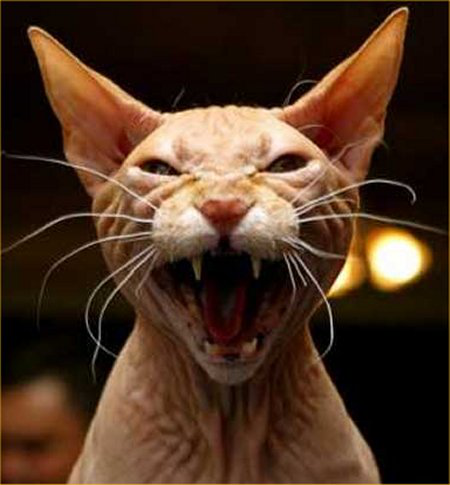

In [9]:
filename = path / "Sphynx_250.jpg"
img = PILImage.create(filename); img

In [10]:
def get_y(file_path):
    return cat_or_dog(file_path.name)
get_y(filename)

'cat'

In [11]:
dblock = DataBlock(blocks    = (ImageBlock, CategoryBlock),
                   get_y     = get_y,
                   splitter  = splitter,
                   item_tfms = Resize(224))

In [12]:
# override shuffle_fn so that the images never actually get shuffled (batch order is consistent)
dataloaders = dblock.dataloaders(image_files, batch_size=9, shuffle_fn=lambda idxs: idxs)

In [13]:
dataloaders.train.n

5912

# What does a batch of images look like?

Since we set the `shuffle_fn` to the identity above, the images will always get loaded in the same order, so the first batch will always be the same:

In [14]:
batch = dataloaders.train.one_batch()
images, labels = batch

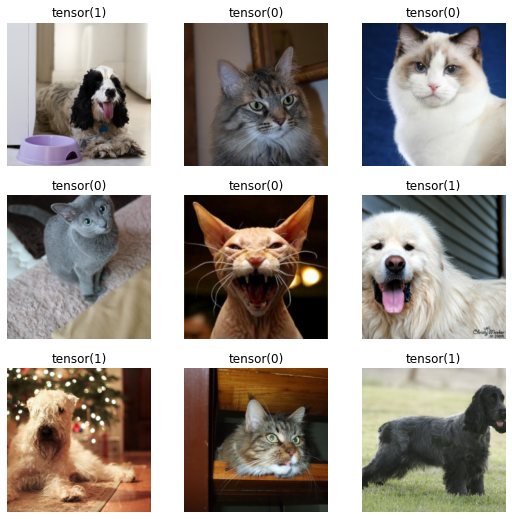

In [15]:
show_image_batch((images, labels))

In [16]:
images.shape

(9, 3, 224, 224)

**What does that shape mean?**

* 9 is the number of images in the batch (**batch size**)
* 3 is the number of color channels (RGB)
    * A batch of images can be represented as a collection
    * A pixel is stored as an RGB value
* 224 is the length or width of each image (in pixels)

Note: the batch of images can be seen as a 4-dimensional tensor, each image represented as a 3-dimensional tensor. Each image stores pixels, which can be seen as a stack of RGB values.

In [17]:
labels

TensorCategory([1, 0, 0, 0, 0, 1, 1, 0, 1], device='cuda:0')

**What do those numbers mean?**

In [18]:
# Create a list of the labels
vocab = dataloaders.train.vocab
vocab[0], vocab[1]

('cat', 'dog')

**Exercise: show the first image in the batch.**

<AxesSubplot:>

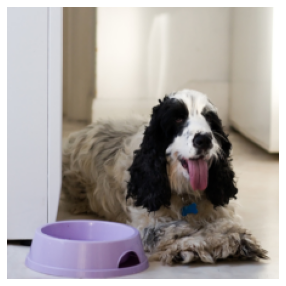

In [28]:
show_image(images[0])

**Exercise: show the average image (mean along dimension ___)**.

<AxesSubplot:>

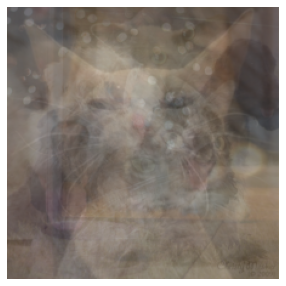

In [38]:
show_image(images.mean(dim=0)) # dimension 0 represents batch size
                               # so we can blend all images together

**Exercise: make the images grayscale**.

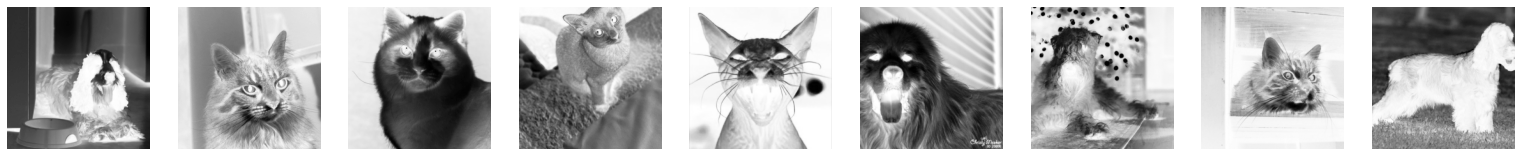

In [40]:
show_images(images.mean(dim=1))  # dimension 1 represents color, so
                                 # removing dimension 1 makes all images black
                                 # and white

**Exercise: invert the color of the images** (e.g., black becomes white)

**Exercise: show only the red color channel**

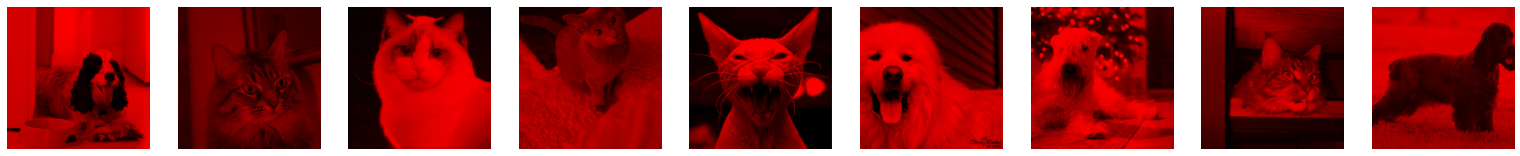

In [53]:
images[:, 0, :, :] # the last 3 parameters (0, :, :) represent
                   # the RGB values
images[:, 1] = 0   # this sets green to 0
images[:, 2] = 0   # this sets blue to 0
show_images(images)

**Exercise:: show a 64-pixel-square cutout of the image, starting at 64 pixels in from the top and left.**

**Exercise: show the result of applying `Rotate` on the images.** Set `max_deg` to 45 and `p` to 1.0.

# Data Augmentation

In [20]:
dblock = DataBlock(blocks    = (ImageBlock, CategoryBlock),
                   get_y     = lambda filename: cat_or_dog(filename.name),
                   splitter  = splitter,
                   item_tfms = RandomResizedCrop(128),
                   batch_tfms= aug_transforms())
dblock.summary(image_files)
dataloaders_aug = dblock.dataloaders(image_files, batch_size=9, shuffle_fn=lambda idxs: idxs)

Setting-up type transforms pipelines
Found 7390 items
2 datasets of sizes 5912,1478
Setting up Pipeline: PILBase.create
Setting up Pipeline: <lambda> -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}



Building one sample
  Pipeline: PILBase.create
    starting from
      /scratch/cs344/data/oxford-iiit-pet/images/english_cocker_spaniel_177.jpg
    applying PILBase.create gives
      PILImage mode=RGB size=500x500
  Pipeline: <lambda> -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
    starting from
      /scratch/cs344/data/oxford-iiit-pet/images/english_cocker_spaniel_177.jpg
    applying <lambda> gives
      dog
    applying Categorize -- {'vocab': None, 'sort': True, 'add_na': False} gives
      TensorCategory(1)

Final sample: (PILImage mode=RGB size=500x500, TensorCategory(1))


Found 7390 items
2 datasets of sizes 5912,1478
Setting up Pipeline: PILBase.create
Setting up Pipeline: <lambda> -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
Setting up after_item: Pipeline: RandomResizedCrop -- {'size': (128, 128), 'min_scale': 0.08, 'ratio': (0.75, 1.3333333333333333), 'resamples': (2, 0), 'val_xtra': 0.14, 'p': 1.0} -> ToTensor
Setting up before_ba


Building one batch
Applying item_tfms to the first sample:
  Pipeline: RandomResizedCrop -- {'size': (128, 128), 'min_scale': 0.08, 'ratio': (0.75, 1.3333333333333333), 'resamples': (2, 0), 'val_xtra': 0.14, 'p': 1.0} -> ToTensor
    starting from
      (PILImage mode=RGB size=500x500, TensorCategory(1))
    applying RandomResizedCrop -- {'size': (128, 128), 'min_scale': 0.08, 'ratio': (0.75, 1.3333333333333333), 'resamples': (2, 0), 'val_xtra': 0.14, 'p': 1.0} gives
      (PILImage mode=RGB size=128x128, TensorCategory(1))
    applying ToTensor gives
      (TensorImage of size 3x128x128, TensorCategory(1))

Adding the next 3 samples

No before_batch transform to apply

Collating items in a batch

Applying batch_tfms to the batch built
  Pipeline: IntToFloatTensor -- {'div': 255.0, 'div_mask': 1} -> Flip -- {'size': None, 'mode': 'bilinear', 'pad_mode': 'reflection', 'mode_mask': 'nearest', 'align_corners': True, 'p': 0.5} -> Brightness -- {'max_lighting': 0.2, 'p': 1.0, 'draw': None,

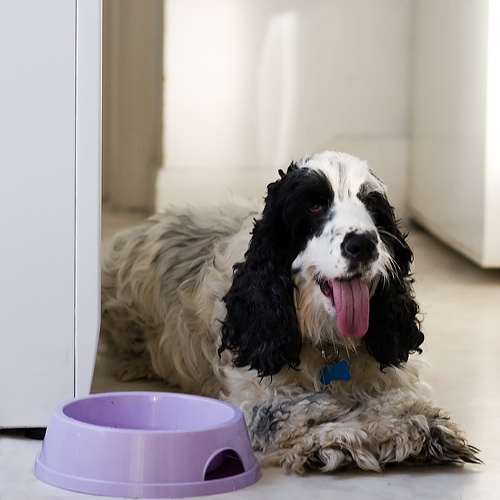

In [21]:
dataloaders_aug.train.dataset[0][0]

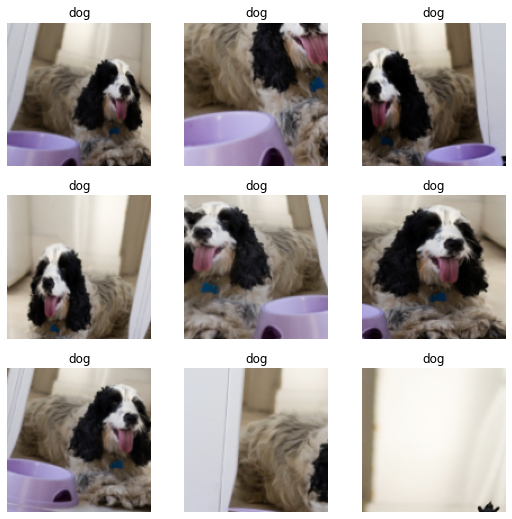

In [22]:
dataloaders_aug.train.show_batch(unique=True)